In [1]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv("insurance_data.csv")

In [3]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [4]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


# Column Types

- **Numerical** - PatientID,Age,bmi,bloodpressure,claim,children
- **Categorical** - gender, diabetic, smoker, region

In [5]:
### Univariate Analysis

In [6]:
# Age


# conclusion:
# 1. There is no outlier in the age column
# 2. There is 5 missing values
# 3. max age is recorded 60 and mean age is 38 which shows very old people have not been insured
# 4. skewness of data is 0.11
# 5. data has 2 peak point which mean 2 age group insured claim most
# 6. feature engineering on one column to identify these age groups
    

In [7]:
df["age"].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

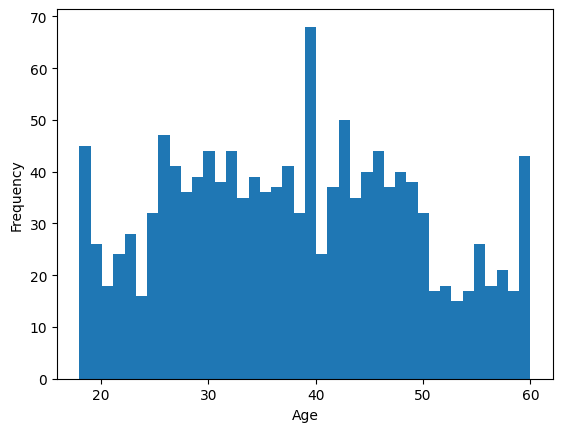

In [8]:
df["age"].plot(kind = 'hist',bins =40)
plt.xlabel("Age")
plt.show()


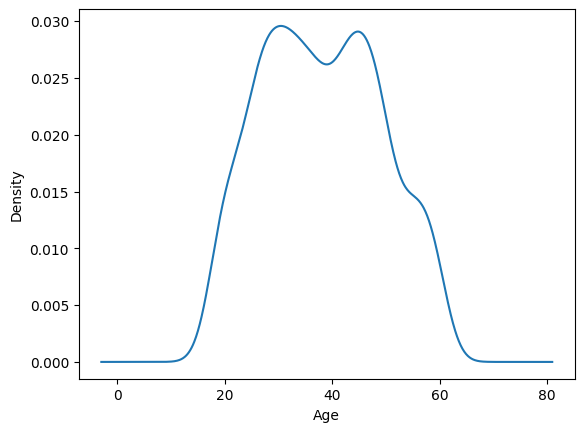

In [9]:
df["age"].plot(kind = 'kde')
plt.xlabel("Age")
plt.show()

In [10]:
df['age'].skew()

0.11361133741072633

<AxesSubplot: >

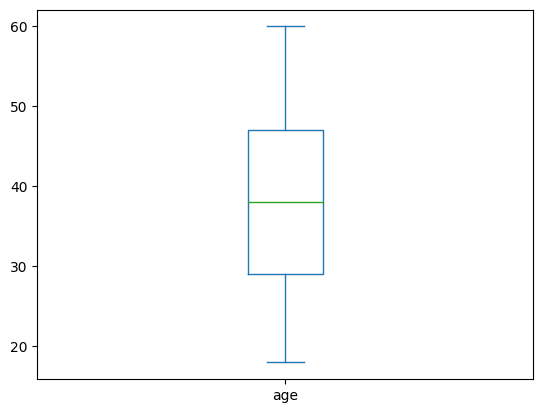

In [11]:
df["age"].plot(kind ="box")

In [12]:
df["age"].isnull().sum()

5

In [13]:
# Feature engineering on age:

In [14]:
def age_category(age):
    if age > 18 and age < 24:
        return "Young adult"
    if age >= 24 and age <= 39:
        return "Adults"
    if age >= 40:
        return "Senior adults"

In [15]:
df['age_category']=df['age'].apply(age_category)

In [16]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_category
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,Adults
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,Adults
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,None
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40,None
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,Senior adults
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,Senior adults
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,Adults
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,Adults


In [17]:
df['age_category'].value_counts()

Senior adults    611
Adults           583
Young adult      125
Name: age_category, dtype: int64

<AxesSubplot: ylabel='age_category'>

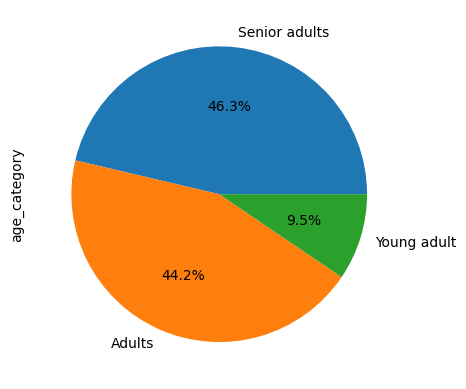

In [18]:
df['age_category'].value_counts().plot(kind = "pie",autopct='%0.1f%%')

In [19]:
# findings:

# After Feature Engineering we can clearly say that 46% persons are senior adults .age 
# above 40 and
# 44.2% persons are adults which is causing two peaks in data

# bmi

In [20]:
# bmi



# Conclusion:
# 1. distribution is perfect

# 2. skewness is minimal

# 3. boxplot indicated some serious outliers,bmi above 50 shows very obese and its very fatal


In [21]:
df["bmi"].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

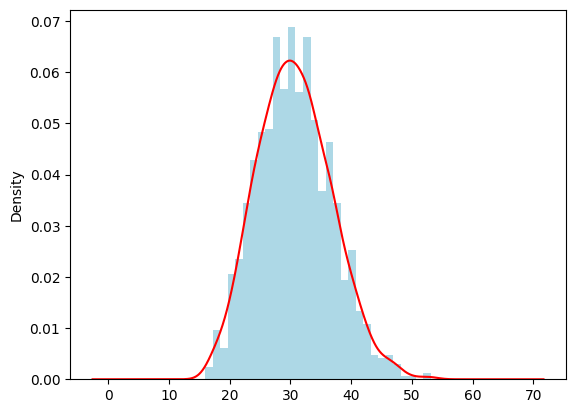

In [22]:
df["bmi"].plot(kind ="hist",bins = 30,density=True,color='lightblue')
df["bmi"].plot(kind ="kde",color ='red')
plt.show()

In [23]:
df['bmi'].skew()

0.28597245020808587

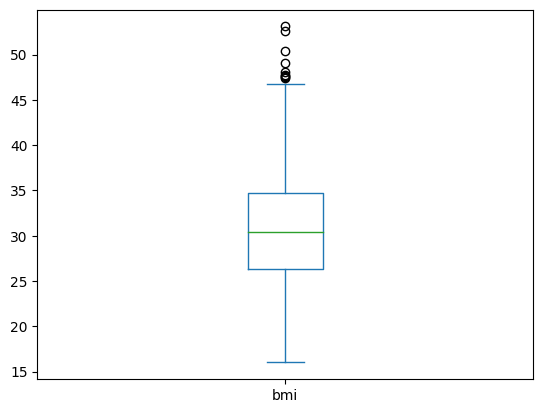

In [24]:
df['bmi'].plot(kind ="box")
plt.show()

In [25]:
df[df['bmi'] >50]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_category
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46,Adults
141,141,142,46.0,male,50.4,89,Yes,1,No,southeast,2438.06,Senior adults
1299,1299,1300,50.0,male,52.6,110,No,1,Yes,southeast,44501.40,Senior adults


In [26]:
df[df['bmi'] >35]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_category
6,6,7,NaN,male,37.3,86,Yes,0,No,northwest,1141.45,None
7,7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80,Young adult
8,8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40,Young adult
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46,Adults
18,18,19,49.0,male,35.4,97,Yes,0,No,southwest,1263.25,Senior adults
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1332,1333,26.0,male,37.0,120,No,2,Yes,southeast,49577.66,Adults
1333,1333,1334,44.0,male,36.4,127,No,1,Yes,southwest,51194.56,Senior adults
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,Senior adults
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,Senior adults


In [27]:
df['bmi'].isnull().sum() # no missing values

0

In [28]:
# we need to feature engineer on bmi column

In [29]:
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi >=18.5 and bmi < 24.9:
        return "Healthy"
    elif bmi >= 25 and bmi < 29.9:
        return "Overweight"
    elif bmi>=30 and bmi <40:
        return "Obese"
    else:
        return "very Obese"

In [30]:
df['bmi_category']=df['bmi'].apply(bmi_category)

In [31]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_category,bmi_category
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,Adults,Healthy
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,Adults,Obese
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,None,Obese
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40,None,Obese
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01,None,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,Senior adults,Obese
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,Senior adults,Obese
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,Adults,Obese
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,Adults,Obese


In [32]:
df['bmi_category'].value_counts()

Obese          615
Overweight     377
Healthy        220
very Obese     108
Underweight     20
Name: bmi_category, dtype: int64

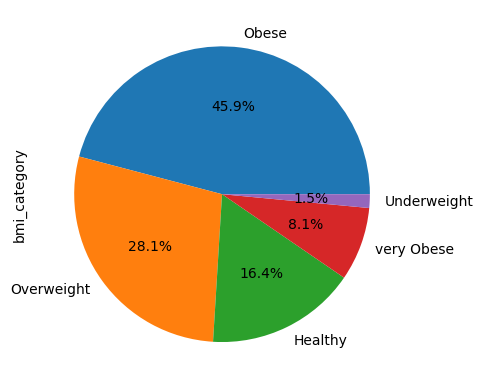

In [33]:
df['bmi_category'].value_counts().plot(kind ="pie",autopct='%0.1f%%')
plt.show()

In [34]:
# finding:
# 1. Most of people almost 46% are obese i.e 615 persons
# 2. 8.1% i.e 92 person were severely obese causing health problems

# bloodpressure

In [35]:
# bloodpressure


# Conclusion:
# 1. data is highly positively skewed with skewness of 1.48

# 2. boxplot shows some serious outliers which is cause of positive skewness

# 3. bp higher than 120 is counted 55 

In [36]:
df['bloodpressure'].describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

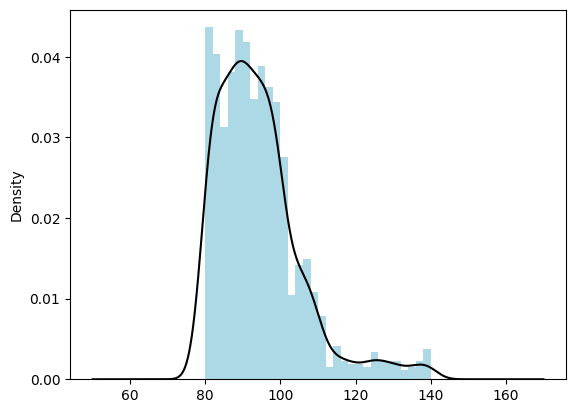

In [37]:
df['bloodpressure'].plot(kind ="hist",bins = 30,density=True,color='lightblue')
df['bloodpressure'].plot(kind ="kde",color ='black')



plt.show()

In [38]:
df['bloodpressure'].skew()

1.4835342102293079

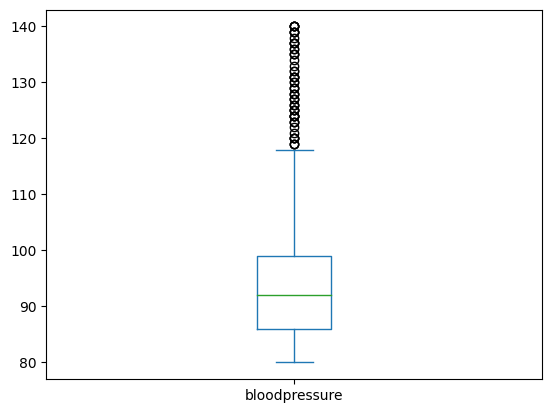

In [39]:
df['bloodpressure'].plot(kind = 'box')
plt.show()

In [40]:
df[df['bloodpressure'] > 120]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_category,bmi_category
1147,1147,1148,29.0,female,32.7,128,Yes,2,No,northwest,26018.95,Adults,Obese
1150,1150,1151,55.0,female,27.1,135,No,1,No,southwest,26140.36,Senior adults,Overweight
1152,1152,1153,38.0,female,35.9,128,No,1,No,northeast,26392.26,Adults,Obese
1153,1153,1154,43.0,male,36.8,126,No,2,No,northwest,26467.10,Senior adults,Obese
1154,1154,1155,31.0,male,23.8,126,Yes,0,Yes,southeast,26926.51,Adults,Healthy
1156,1156,1157,46.0,female,23.0,137,Yes,0,Yes,southeast,27037.91,Senior adults,Healthy
1161,1161,1162,22.0,male,22.4,137,Yes,2,No,northeast,27375.90,Young adult,Healthy
1166,1166,1167,23.0,male,26.7,123,Yes,0,Yes,northeast,28101.33,Young adult,Overweight
1169,1169,1170,27.0,male,36.7,130,No,1,No,northwest,28468.92,Adults,Obese
1174,1174,1175,44.0,female,29.1,139,No,0,Yes,northwest,29141.36,Senior adults,Overweight


In [41]:
df['bloodpressure'].isnull().sum()

0

In [42]:
#Feature engineering on bloodpressure column

In [43]:
def bp_category(bp):
    if bp < 80:
        return "Low"
    elif 80 <= bp < 89:
        return "Elevated"
    elif 90 <= bp <= 99:
        return "High"
    elif 100 <= bp < 120:
        return "Extremely High"
    else:
        return "Fatal"

In [44]:
df["bp_category"] =df['bloodpressure'].apply(bp_category)

In [45]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_category,bmi_category,bp_category
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,Adults,Healthy,High
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,Adults,Obese,Elevated
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,None,Obese,Elevated
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40,None,Obese,Elevated
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01,None,Obese,Extremely High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,Senior adults,Obese,Elevated
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,Senior adults,Obese,Fatal
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,Adults,Obese,High
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,Adults,Obese,Extremely High


In [46]:
df["bp_category"].value_counts()

High              498
Elevated          469
Extremely High    256
Fatal             117
Name: bp_category, dtype: int64

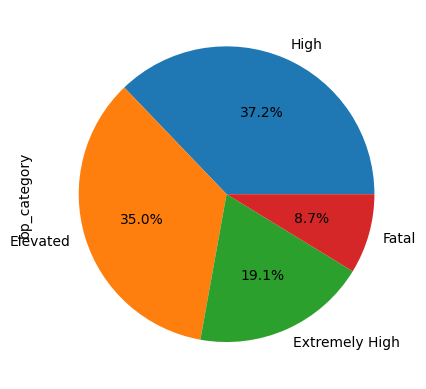

In [47]:
df["bp_category"].value_counts().plot(kind = "pie",autopct ='%0.1f%%')

plt.show()

In [48]:
# findings:
    
# 1. There is high chance that many people have been died due to high bloodpressure or they are patients of hypertension
#     a. 37.2% of people were suffering from stage 1 hypertension with bp higher than 90 (diastolic)
#     b. 19.1% have stage 2 hypertension in this all category all are having more than 100 mmHg(diastolic)
#     c. 8.7% have higher than 120 and some also have higher than 140

# claim

In [49]:
# claim


# Conclusion:
# 1. highly skewed data with positve skewness of 1.5

# 2. There are more than 150 outliers which shows some people have been given more claim. 


In [50]:
df['claim'].describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

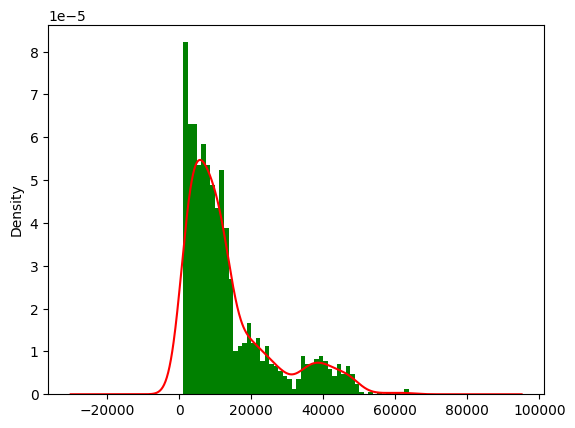

In [51]:
df['claim'].plot(kind ='hist',bins = 50,color ='g',density=True)
df['claim'].plot(kind ='kde',color = 'red')
plt.show()

In [52]:
df['claim'].skew()

1.5167468509489237

<AxesSubplot: >

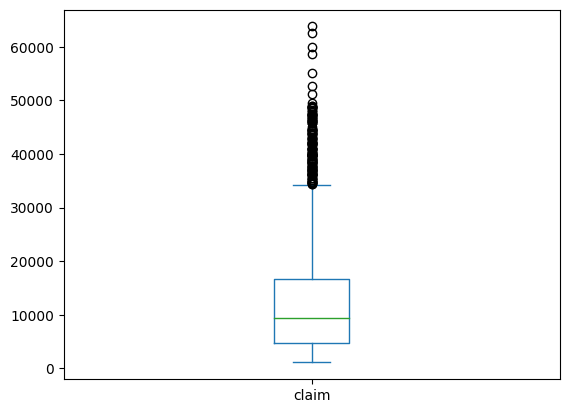

In [53]:
df['claim'].plot(kind ="box")

In [54]:
df[df['claim']>30000].count()

index            162
PatientID        162
age              162
gender           162
bmi              162
bloodpressure    162
diabetic         162
children         162
smoker           162
region           162
claim            162
age_category     160
bmi_category     162
bp_category      162
dtype: int64

In [55]:
df[df['claim']<30000].count()

index            1178
PatientID        1178
age              1173
gender           1178
bmi              1178
bloodpressure    1178
diabetic         1178
children         1178
smoker           1178
region           1175
claim            1178
age_category     1159
bmi_category     1178
bp_category      1178
dtype: int64

In [56]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_category,bmi_category,bp_category
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,Adults,Healthy,High
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,Adults,Obese,Elevated
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,None,Obese,Elevated
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40,None,Obese,Elevated
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01,None,Obese,Extremely High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,Senior adults,Obese,Elevated
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,Senior adults,Obese,Fatal
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,Adults,Obese,High
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,Adults,Obese,Extremely High


In [57]:
# Univariate Analysis on Categorical Column

In [58]:
# gender:
    
    
    
# Conclusion:
# 1.male and female percentage is almost same
#2.there is no missing value


In [59]:
df['gender'].value_counts()

male      678
female    662
Name: gender, dtype: int64

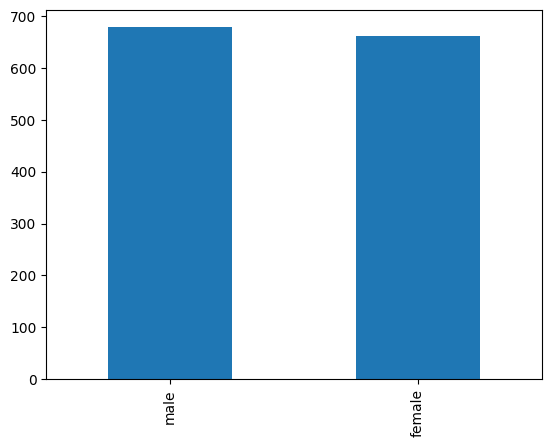

In [60]:
df['gender'].value_counts().plot(kind ='bar')
plt.show()

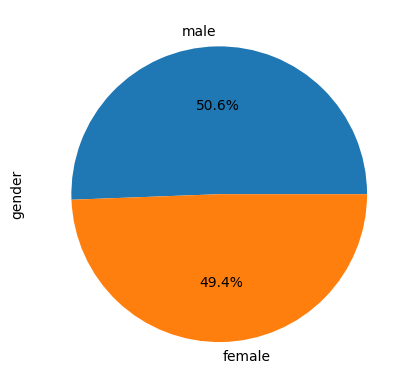

In [61]:
df['gender'].value_counts().plot(kind ='pie',autopct = '%0.1f%%')
plt.show()

In [62]:
df['gender'].isnull().sum()

0

In [63]:
# diabetic



# conclusion
#1. both ratio are almost same diabetic and non diabetic

In [64]:
df['diabetic'].value_counts()

No     698
Yes    642
Name: diabetic, dtype: int64

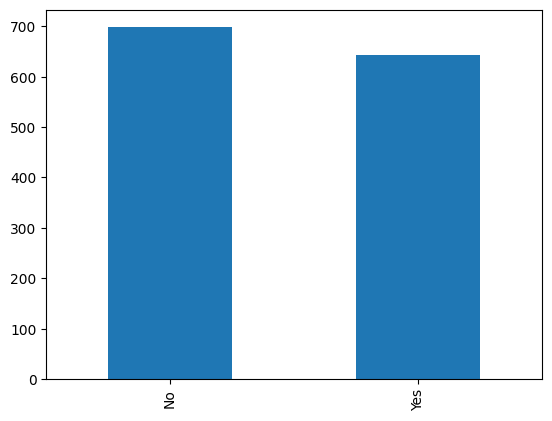

In [65]:
df['diabetic'].value_counts().plot(kind = 'bar')
plt.show()

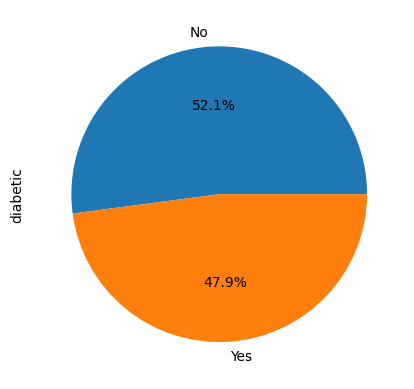

In [66]:
df['diabetic'].value_counts().plot(kind = 'pie',autopct = '%0.1f%%')
plt.show()

In [67]:
df['gender'].isnull().sum()

0

In [68]:
# smoker


# Conclusion:
#1. most of the peoples are non smoker

In [69]:
df['smoker'].value_counts()

No     1066
Yes     274
Name: smoker, dtype: int64

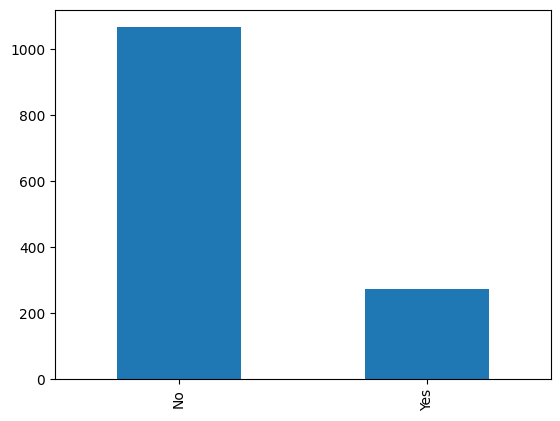

In [70]:
df['smoker'].value_counts().plot(kind = 'bar')
plt.show()

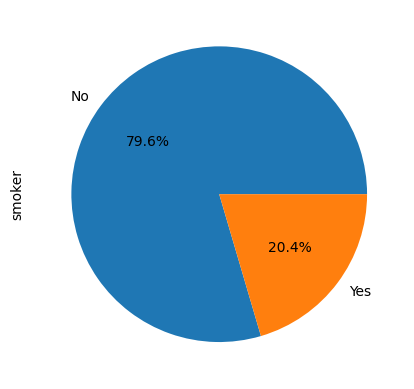

In [71]:
df['smoker'].value_counts().plot(kind = 'pie',autopct = '%0.1f%%')
plt.show()

In [72]:
df['gender'].isnull().sum()

0

In [73]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_category,bmi_category,bp_category
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,Adults,Healthy,High
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,Adults,Obese,Elevated
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,None,Obese,Elevated
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40,None,Obese,Elevated
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01,None,Obese,Extremely High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,Senior adults,Obese,Elevated
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,Senior adults,Obese,Fatal
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,Adults,Obese,High
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,Adults,Obese,Extremely High


# bivariate Analysis

In [74]:
# Numerical vs Numerical Column

In [75]:
# age vs bmi

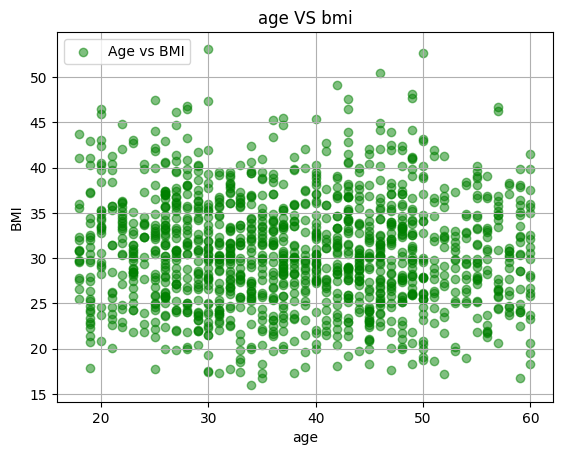

In [76]:
plt.scatter(df['age'],df['bmi'],color='green',alpha=0.5, label='Age vs BMI')
plt.title('age VS bmi')
plt.grid(True)
plt.xlabel("age")
plt.ylabel('BMI')
plt.legend()
plt.show()

In [77]:
# bloodpressure vs claim

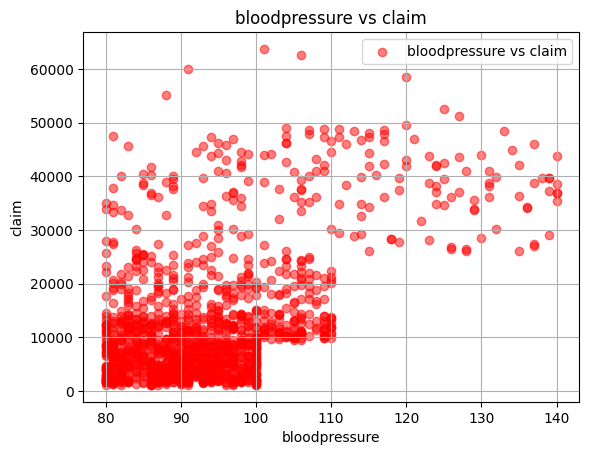

In [78]:
plt.scatter(df['bloodpressure'],df['claim'],color = 'red',alpha = 0.5,label = 'bloodpressure vs claim')
plt.title("bloodpressure vs claim")
plt.grid(True)
plt.xlabel("bloodpressure")
plt.ylabel("claim")
plt.legend()
plt.show()

In [79]:
# Age VS claim

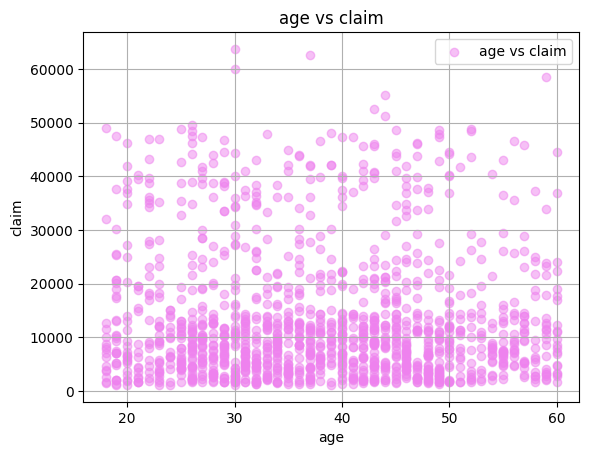

In [80]:
plt.scatter(df['age'],df['claim'],color = 'violet',alpha = 0.5,label = 'age vs claim')
plt.title("age vs claim")
plt.grid(True)
plt.xlabel("age")
plt.ylabel("claim")
plt.legend()
plt.show()

In [81]:
# children VS claim

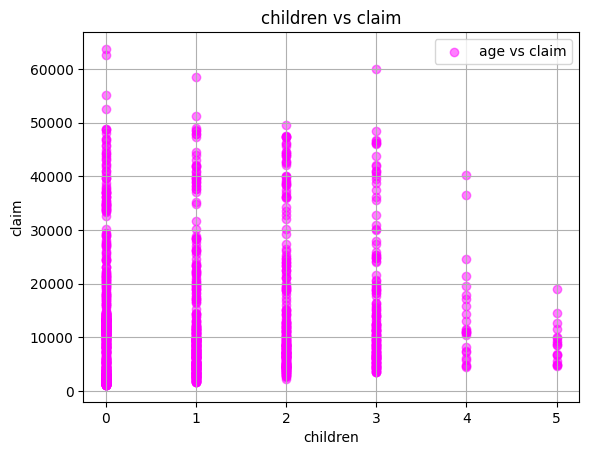

In [82]:
plt.scatter(df['children'],df['claim'],color = 'magenta',alpha = 0.5,label = 'age vs claim')
plt.title("children vs claim")
plt.grid(True)
plt.xlabel("children")
plt.ylabel("claim")
plt.legend()
plt.show()

In [83]:
# findings: people having less children have more claim

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_13548\3851526182.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


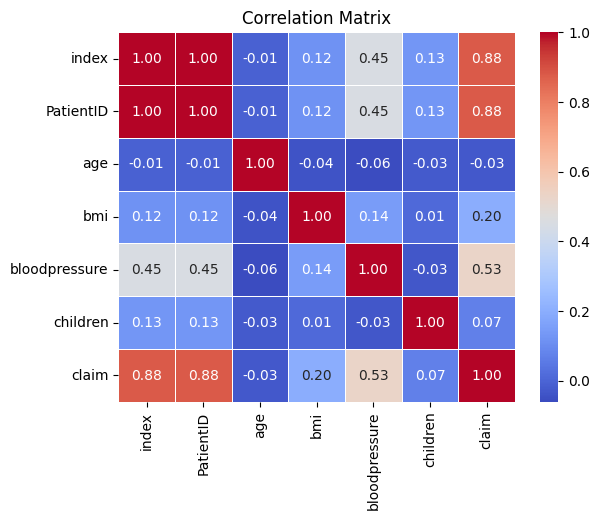

In [84]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()


In [85]:
# findings: correlation between bloodpressure and claim is 0.53 so they are most related with respect to heatmap

In [86]:
# Numerical - Categorical
# barplot,boxplot,kdeplot,violin plot, scatterplot

In [87]:
df.head(3)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_category,bmi_category,bp_category
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,Adults,Healthy,High
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,Adults,Obese,Elevated
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,None,Obese,Elevated


In [88]:
# claim VS bp_category

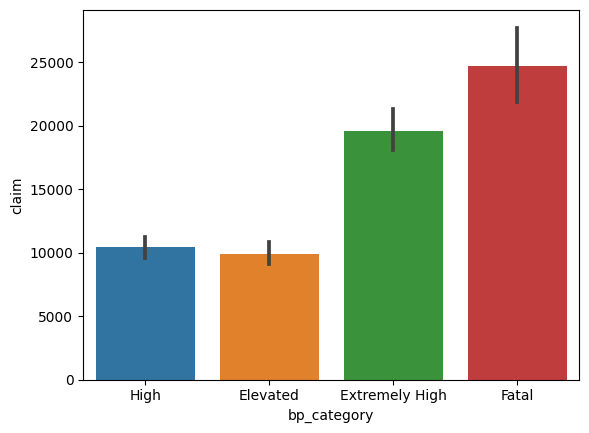

In [89]:
sns.barplot(x=df['bp_category'],y=df['claim'])
plt.xlabel('bp_category')
plt.ylabel('claim')
plt.show()

In [90]:
# findings: Person with very extremely high bp i.e. Fatal BP have high claim ratio

In [91]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_category,bmi_category,bp_category
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,Adults,Healthy,High
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,Adults,Obese,Elevated
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,None,Obese,Elevated
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40,None,Obese,Elevated
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01,None,Obese,Extremely High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,Senior adults,Obese,Elevated
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,Senior adults,Obese,Fatal
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,Adults,Obese,High
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,Adults,Obese,Extremely High


In [ ]:
# diabetic VS claim



C:\Users\Hitesh\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


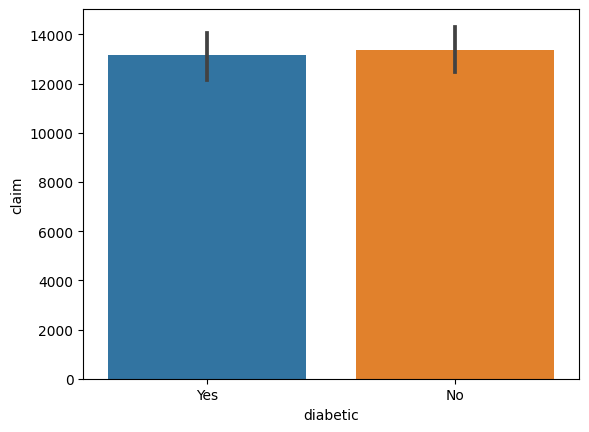

In [93]:
sns.barplot(df['diabetic'],df['claim'])
plt.show()

In [ ]:
# bmi VS diabetic

C:\Users\Hitesh\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


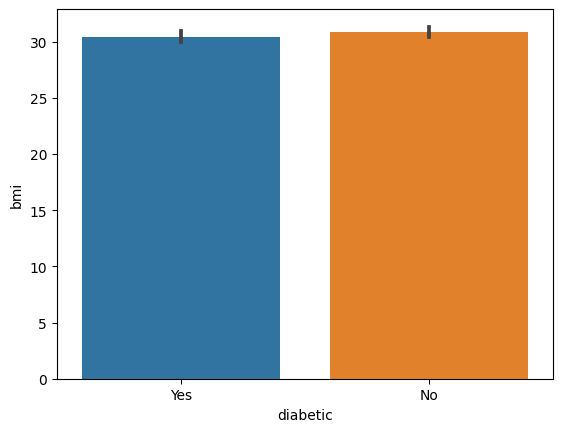

In [97]:
sns.barplot(df['diabetic'],df['bmi'])
plt.show()

In [ ]:
# smoker VS claim

#findings: peopele who smoke have higer no of claim

C:\Users\Hitesh\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


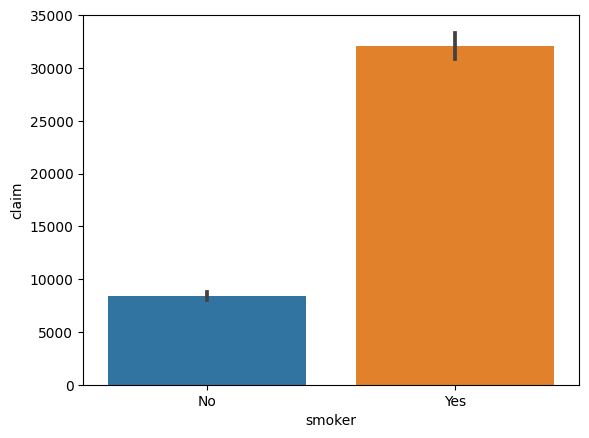

In [98]:
sns.barplot(df['smoker'],df['claim'])
plt.show()

In [ ]:
# region VS claim

#findings: north east region highest no of claim

C:\Users\Hitesh\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


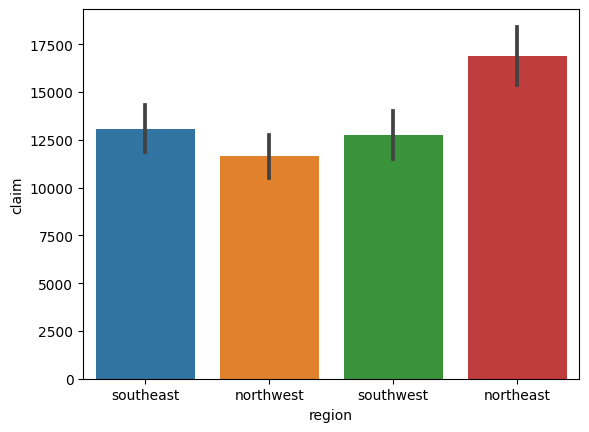

In [99]:
sns.barplot(df['region'],df['claim'])
plt.show()

In [ ]:
# Categorical - Categorical
# create cross tabulations or contengency table group by categorical column heatmap, stacked barplots, treemaps




In [ ]:
# gender VS bmi_category

In [101]:
pd.crosstab(df['gender'],df['bmi_category'],normalize= True)*100

bmi_category,Healthy,Obese,Overweight,Underweight,very Obese
gender,,,,,
female,8.507463,21.865672,14.253731,0.895522,3.880597
male,7.910448,24.029851,13.880597,0.597015,4.179104


<AxesSubplot: xlabel='bmi_category', ylabel='gender'>

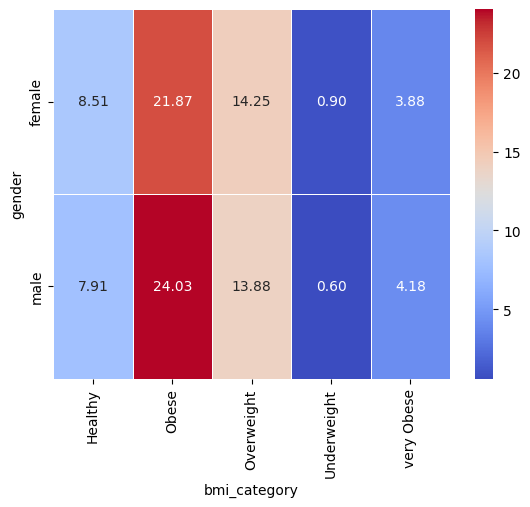

In [118]:
sns.heatmap(pd.crosstab(df['gender'], df['bmi_category'], normalize=True)*100, cmap='coolwarm', fmt='.2f', annot=True, linewidths=0.5)

In [ ]:
# smoker VS bp_category

In [119]:
pd.crosstab(df['smoker'],df['bp_category'],normalize= True)*100

bp_category,Elevated,Extremely High,Fatal,High
smoker,,,,
No,30.671642,11.865672,4.402985,32.611940
Yes,4.328358,7.238806,4.328358,4.552239


<AxesSubplot: xlabel='bp_category', ylabel='smoker'>

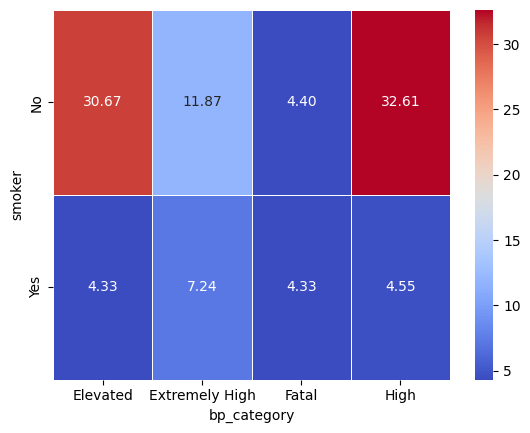

In [126]:
sns.heatmap(pd.crosstab(df['smoker'],df['bp_category'],normalize= True)*100,cmap = 'coolwarm',fmt='.2f', annot=True, linewidths=0.5)

# Multivariate analysis:


In [ ]:
# Smoker vs gender vs claim

#findings: both male and female smokers have  higher claims than non smokers

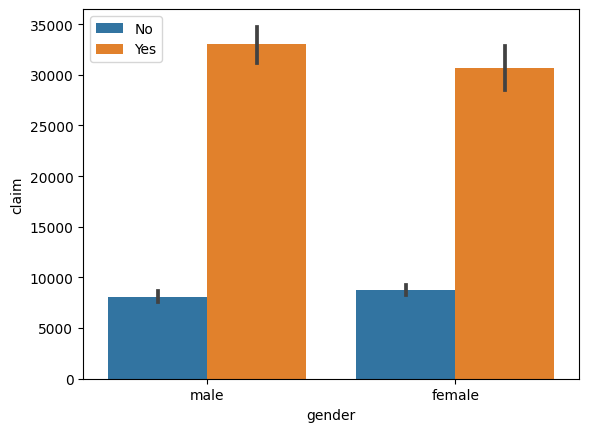

In [132]:
sns.barplot(x=df['gender'],y=df['claim'],hue=df['smoker'])
plt.legend()
plt.show()

In [ ]:
# bp_category vs smoker vs claim

#findings: smoker peson having fatal hypertension have claimed the most

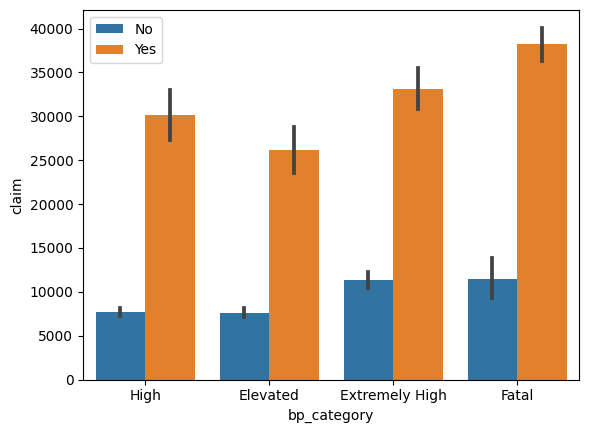

In [134]:
sns.barplot(x=df['bp_category'],y=df['claim'],hue=df['smoker'])
plt.legend()
plt.show()

In [ ]:
# diabetic vs smoker vs claim

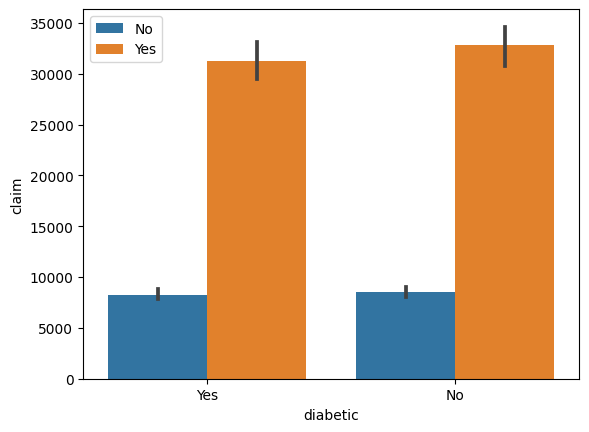

In [136]:
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['smoker'])
plt.legend()
plt.show()

In [ ]:
# bmi_category vs smoker vs claim


#findings: obese and very obese smoker have claimed high

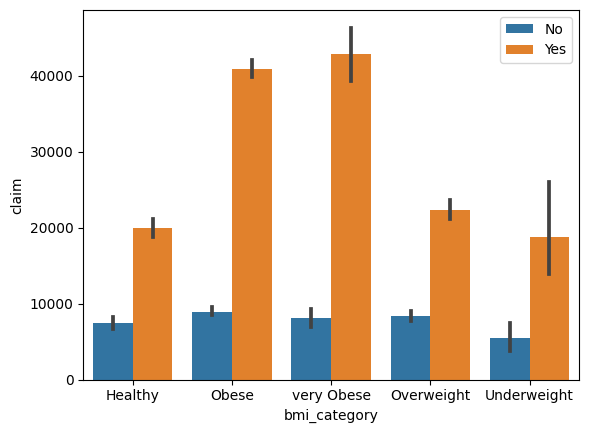

In [138]:
sns.barplot(x=df['bmi_category'],y=df['claim'],hue=df['smoker'])
plt.legend()
plt.show()

In [ ]:
# region vs smoker vs claim

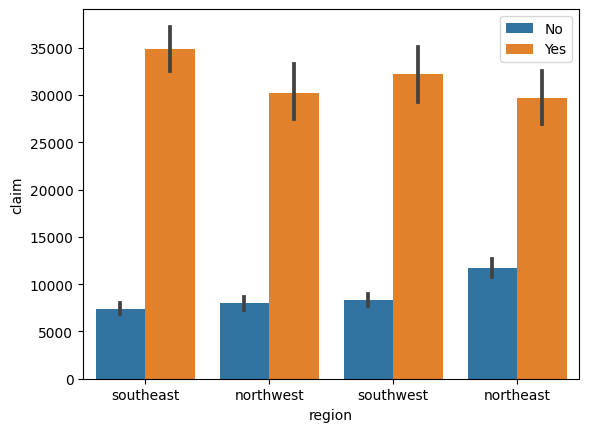

In [139]:
sns.barplot(x=df['region'],y=df['claim'],hue=df['smoker'])
plt.legend()
plt.show()

In [ ]:
# bp_category vs bmi_category vs claim

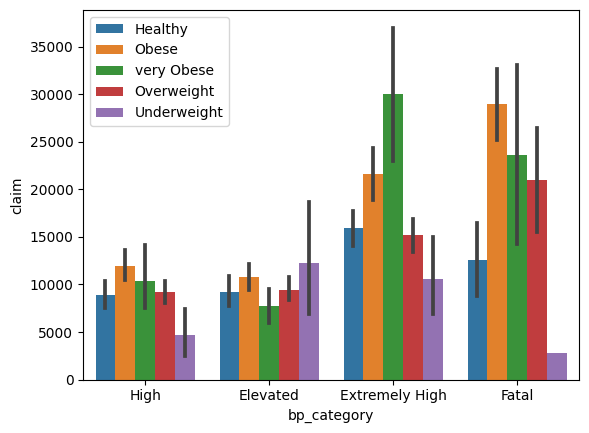

In [140]:
sns.barplot(x=df['bp_category'],y=df['claim'],hue=df['bmi_category'])
plt.legend()
plt.show()

In [ ]:
# age_category vs claim vs smoker

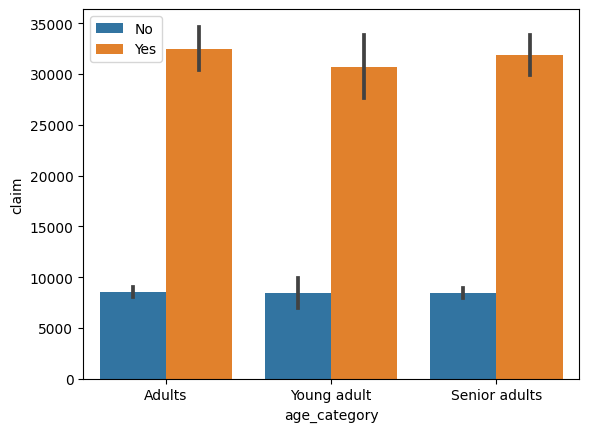

In [142]:
sns.barplot(x=df['age_category'],y=df['claim'],hue=df['smoker'])
plt.legend()
plt.show()

In [ ]:
# region vs bp_category vs claim

#findings:Northeastern people and southwestern people with fatal hypertension  have claimed high

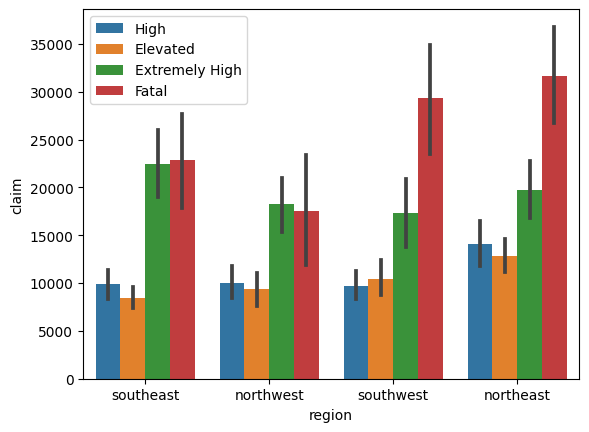

In [143]:
sns.barplot(x=df['region'],y=df['claim'],hue=df['bp_category'])
plt.legend()
plt.show()

In [ ]:
# children vs smoker vs claim

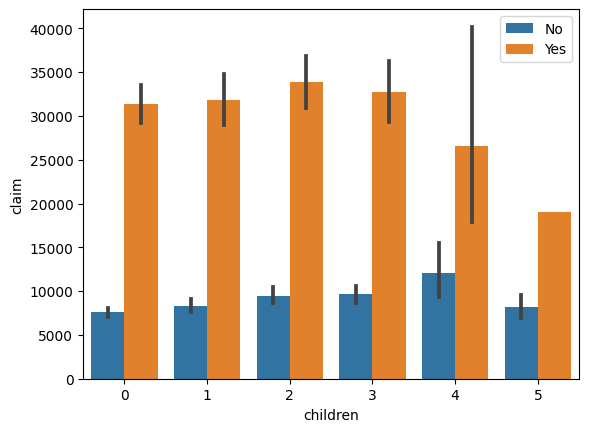

In [147]:
sns.barplot(x=df['children'],y=df['claim'],hue=df['smoker'])
plt.legend()
plt.show()

In [ ]:
# children vs bp_category vs claim

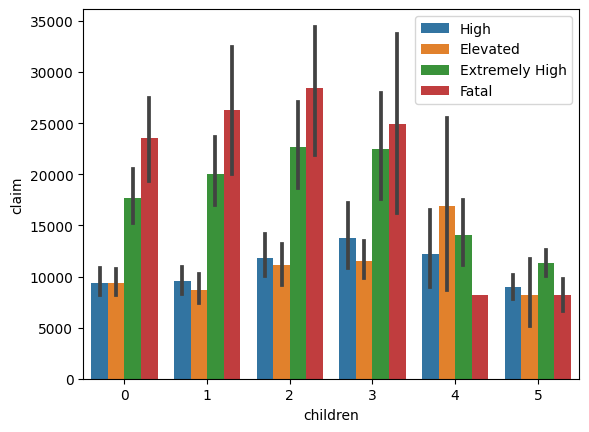

In [148]:
sns.barplot(x=df['children'],y=df['claim'],hue=df['bp_category'])
plt.legend()
plt.show()

In [ ]:
# children vs bmi_category vs claim

#findings:people with 2,3 children and are obese or very obese i.e bmi above 30 have clamed high

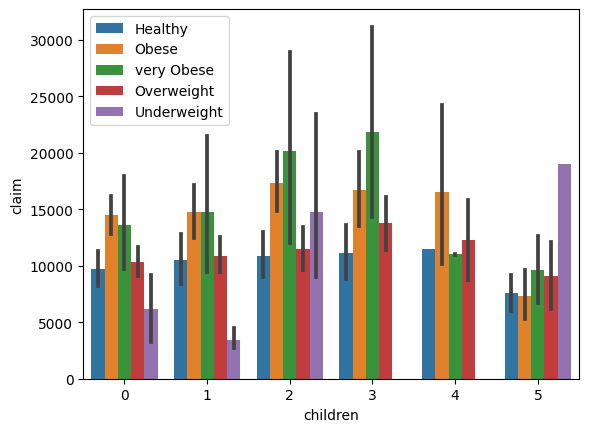

In [149]:
sns.barplot(x=df['children'],y=df['claim'],hue=df['bmi_category'])
plt.legend()
plt.show()

In [ ]:
# findings:

# northeastern and southeastern smoker persons suffering from hypertension
# obese or very obese(bmi>30) have claimed the highest